In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [56]:
df=pd.read_csv('loan.csv')
df.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved


In [57]:
cate_col=[]
for col in df.columns:
    if df[col].dtype=='object':
        cate_col.append(col)
cate_col

['gender', 'occupation', 'education_level', 'marital_status', 'loan_status']

In [58]:
from sklearn.preprocessing import LabelEncoder
LE =LabelEncoder()
for col in cate_col:
    df[col]=LE.fit_transform(df[col])
df.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,1,12,1,0,85000,720,0
1,45,0,35,4,1,62000,680,0
2,28,1,33,3,1,25000,590,1
3,51,0,16,1,0,105000,780,0
4,36,1,0,1,0,75000,710,0


In [81]:
y=df['loan_status']
x=df.drop('loan_status',axis=1)
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=42)

In [82]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_x=scaler.fit_transform(train_x)
test_x=scaler.fit_transform(test_x)

In [83]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [84]:
model.fit(train_x,train_y)

LogisticRegression()

In [85]:
y_hat=model.predict(test_x)
y_hat

array([0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0])

In [86]:
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix,classification_report
print('accuracy',accuracy_score(test_y,y_hat))
print('recall',recall_score(test_y,y_hat))
print('confusion \n',confusion_matrix(test_y,y_hat))
print('\nClassification Report \n\n',classification_report(test_y,y_hat))

accuracy 1.0
recall 1.0
confusion 
 [[9 0]
 [0 4]]

Classification Report 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         4

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13



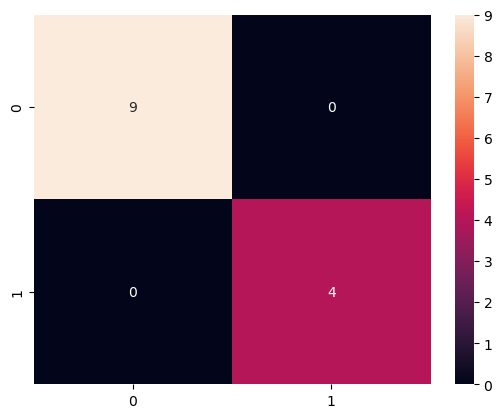

In [89]:
import seaborn as sns
sns.heatmap(confusion_matrix(test_y,y_hat),annot=True)
plt.show()